## What's the probability?
__Problem:__

You pick any integer between 1 and 32. You are then allowed to randomly draw 6 unique integers between 1 and 32. What's the probability that you successfully pulled your own number?

In [3]:
# Basic Python Libs
import numpy as np
import math
import random
from scipy import stats
from itertools import combinations
from matplotlib import pyplot as plt

You can approach this problem in many different ways. I'll stick to the one I find simplest. Also I'll start off with the simplest version of this problem and slowly scale it up.

So the general problem is to find the probability $p_{hit}$ to find a picked number $n_{pick}$ in a pool of a certain number of unique drawn numbers $N_{drawn}$ with a size of $N_{pool}$ out of a total pool of numbers with length $N_{total}$.

Since we draw unique numbers, we know that: $N_{pool}\,<=\,N_{total}$.  
If $N_{pool}=N_{total}$, then we know that $p_{hit}=1$ must be true.

The first non-trivial case is $N_{total} = 2$,  $N_{pool} = 1$:

That's just a coin flip. We have two possible outcomes and we randomly draw one time. Hence: $p_{hit} = \frac{1}{2}$.

The next non-trivial case is $N_{total} = 3$,  $N_{pool} = 1$:

Now we have three possible outcome and randomly draw one time. Hence $p_{hit} = \frac{1}{3}$.

We can see a pattern here. For $N_{pool} = 1$ it follows that $p_{hit} = \frac{1}{N_{total}}$.

Now let's work out the case with $N_{total} = 3$ and  $N_{pool} = 2$:

So our pool of numbers can be described by $\{1,2,3\}$. The chance to pull the correct number depends on two things. The first one is simply the amount of numbers left in the pool, as every number has the same probability to be randomly pulled. The second one is if the correct number is still in the pool. If we already draw the correct number, the chance to pull the correct number becomes $0$.

So we can either draw the correct number with the first draw with a $\frac{1}{3}$ probability or draw a bummer with a $\frac{2}{3}$ probability. If we draw a bummer, we then have a chance to draw the correct number with a $\frac{1}{2}$ probability, since the amount of numbers in our pool decreased by one because of the first draw. Hence the probability to draw the correct number is given by:

$p_{hit} = \frac{1}{3} + \frac{2}{3}\cdot\frac{1}{2} = \frac{1}{3} + \frac{1}{3} = \frac{2}{3} = \frac{N_{pool}}{N_{total}}$

Let's do $N_{total} = 4$ and  $N_{pool} = 2$ & $N_{pool} = 3$:

i) $p_{hit} = \frac{1}{4} + \frac{3}{4}\cdot\frac{1}{3} = \frac{1}{4} + \frac{1}{4} = \frac{2}{4} = \frac{N_{pool}}{N_{total}}$

ii) $p_{hit} = \frac{1}{4} + \frac{3}{4}\cdot\frac{1}{3} + \frac{3}{4}\cdot\frac{2}{3}\cdot\frac{1}{2} = \frac{1}{4} + \frac{1}{4} + \frac{1}{4} = \frac{3}{4} = \frac{N_{pool}}{N_{total}}$

I think everyone got the hang of it by now, so let's do it for the general case for $N_{total} > N_{pool} > 0$ with the Heavyside-function $\mathcal{H}\left(x\right)$.


\begin{align*}
  p_{hit} &= \sum_{i=0}^{N_{pool}-1} \frac{1}{N_{total}-i}\cdot\prod_{j=0}^{i} \frac{N_{total}-j}{N_{total}-j+1\cdot\mathcal{H}\left(i\right)}\\
  p_{hit} &= \sum_{i=0}^{N_{pool}-1} \frac{1}{N_{total}-i}\cdot\frac{N_{total}-i}{N_{total}}\\
  p_{hit} &= \sum_{i=0}^{N_{pool}}\frac{1}{N_{total}}\\
  p_{hit} &= \frac{N_{pool}}{N_{total}}
\end{align*}

Summary:

Solution: $p_{hit} = \frac{N_{pool}}{N_{total}}$

Example: $\frac{6}{32} = \frac{3}{16} = 0.1875$

In [4]:
# range stop is not included
def random_pull(range_start, range_stop, pull_number):
    sample = range(range_start, range_stop)
    return random.sample(sample, pull_number)

def how_many_hits(target, pulls, range_start, range_stop, pull_number):
    if ((target > range_stop-1) | (target < range_start)):
        print("Target number must be in pull range!")
        return 0
    sample_draws = []
    target_hits = 0
    for k in range(pulls):
        sample_draws.append(random_pull(range_start, range_stop, pull_number))
    for draw in sample_draws:
        if target in draw:
            target_hits += 1
    sample_length = len(sample_draws)
    return float(100*target_hits/sample_length)

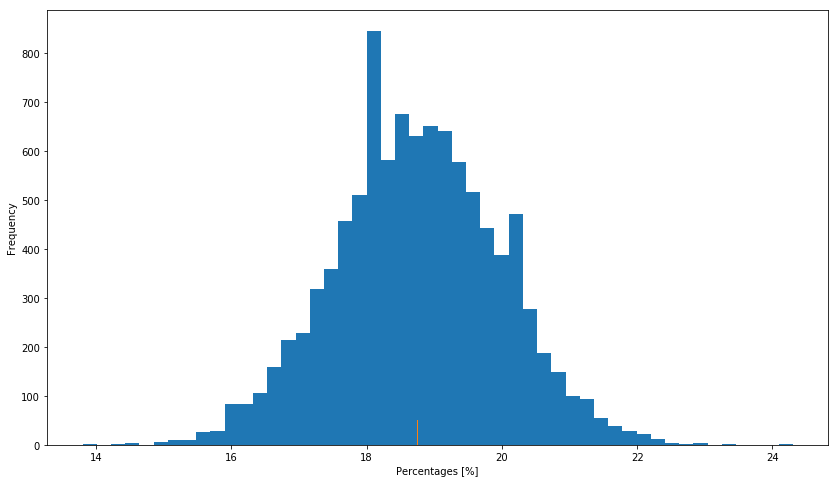

The probability to hit your number is approximately (18.743 +/- 0.012)%.


In [6]:
result_list = []
for tries in range(10000):
    result_list.append(how_many_hits(32, 1000, 1, 33, 6))
  
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)    
ax.hist(result_list, bins=50)
ax.hist([np.average(result_list)]*50, bins=50)
plt.xlabel('Percentages [%]')
plt.ylabel('Frequency')
plt.show()
print("The probability to hit your number is approximately ({0:.3f}".format(np.average(result_list)) + " +/- {0:.3f})%.".format(stats.sem(result_list)))